## <div style="color:white;display:inline-block;border-radius:5px;background-color:black;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0; width:750px;"><b> </b> Global Terrorism Analysis</p></div>

![](https://static.sadhguru.org/d/46272/1635528294-1635528293576.jpg)

## Introduction

In this analysis, our primary focus is to delve into the intricate world of terrorist activities. We aim to shed light on several critical questions:

1. How has the landscape of terrorist incidents evolved over the years? Are there specific regions where these trends deviate from the global norms?
2. What is the rate of success for these attacks?
3. What are the prevalent methods employed in these attacks? Do these methods exhibit variations across different regions or time periods?

These questions form the core of our exploration, as we seek to unravel the dynamics of terrorism worldwide.

## About the dataset

The Dataset was extracted from the Global Terrorism Database (GTD) - an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks.

### Explanation of selected columns:
- **success**: Success of a terrorist strike
- **suicide**: 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide
- **attacktype1**: The general method of attack
- **attacktype1_txt**: The general method of attack and broad class of tactics used.
- **targtype1_txt**: The general type of target/victim
- **targsubtype1_txt**: The more specific target category
- **target1**: The specific person, building, installation that was targeted and/or victimized
- **natlty1_txt**: The nationality of the target that was attacked
- **gname**: The name of the group that carried out the attack
- **gsubname**: Additional details about group that carried out the attack like fractions
- **nperps**: The total number of terrorists participating in the incident
- **weaptype1_txt**: General type of weapon used in the incident
- **weapsubtype1_txt**: More specific value for most of the Weapon Types
- **nkill**: The number of total confirmed fatalities for the incident
- **nkillus**: The number of U.S. citizens who died as a result of the incident

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV files/globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')


df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
# Information on dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
# Displaying the columns
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
# Concise summary of dataset

df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.describe(include='all')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,1.816910e+05,181691.000000,181691.000000,181691.000000,9239,181691.000000,2220,181691.000000,181691,181691.000000,...,28289,115500,76933,43516,181691,181691.000000,181691.000000,181691.000000,181691.000000,25038
unique,NaN,NaN,NaN,NaN,2244,NaN,1859,NaN,205,NaN,...,15429,83988,62263,36090,26,NaN,NaN,NaN,NaN,14306
top,NaN,NaN,NaN,NaN,"September 18-24, 2016",NaN,8/4/1998,NaN,Iraq,NaN,...,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,NaN,NaN,NaN,NaN,"201612010023, 201612010024, 201612010025, 2016..."
freq,NaN,NaN,NaN,NaN,101,NaN,18,NaN,24636,NaN,...,1607,205,134,139,78002,NaN,NaN,NaN,NaN,80
mean,2.002705e+11,2002.638997,6.467277,15.505644,NaN,0.045346,NaN,131.968501,NaN,7.160938,...,NaN,NaN,NaN,NaN,NaN,-4.543731,-4.464398,0.090010,-3.945952,NaN
std,1.325957e+09,13.259430,3.388303,8.814045,NaN,0.208063,NaN,112.414535,NaN,2.933408,...,NaN,NaN,NaN,NaN,NaN,4.543547,4.637152,0.568457,4.691325,NaN
min,1.970000e+11,1970.000000,0.000000,0.000000,NaN,0.000000,NaN,4.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,-9.000000,-9.000000,NaN
25%,1.991021e+11,1991.000000,4.000000,8.000000,NaN,0.000000,NaN,78.000000,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,-9.000000,NaN
50%,2.009022e+11,2009.000000,6.000000,15.000000,NaN,0.000000,NaN,98.000000,NaN,6.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,0.000000,NaN
75%,2.014081e+11,2014.000000,9.000000,23.000000,NaN,0.000000,NaN,160.000000,NaN,10.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN


In [9]:
# Checking for null values
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [11]:
# Renaming columns

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'
                    },inplace=True)

## **Yearly Plot**

In [12]:
# As we have many columns, we take the columns that are necessary for analysis
df = df[['eventid','Year','Month','Day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded',
            'Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

In [13]:
df.head()

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1


In [14]:
df.isnull().sum()

eventid             0
Year                0
Month               0
Day                 0
Country             0
Region              0
state             421
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
success             0
dtype: int64

In [15]:
df1= df.dropna(axis=0)

In [16]:
df.head(5)

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1


## **EDA**

In [17]:
year_attacks = df.groupby('Year').size().reset_index(name='count')

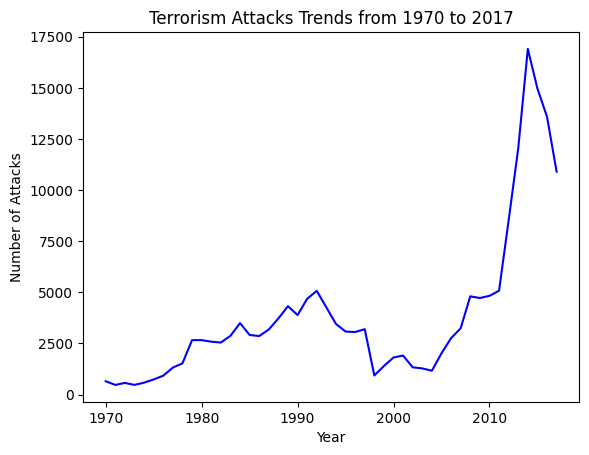

In [18]:
sns.lineplot(x='Year', y='count', data=year_attacks, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title("Terrorism Attacks Trends from 1970 to 2017")
plt.show()

In [19]:
year_attacks_region = df.groupby(['Year','Region']).size().reset_index(name='count')

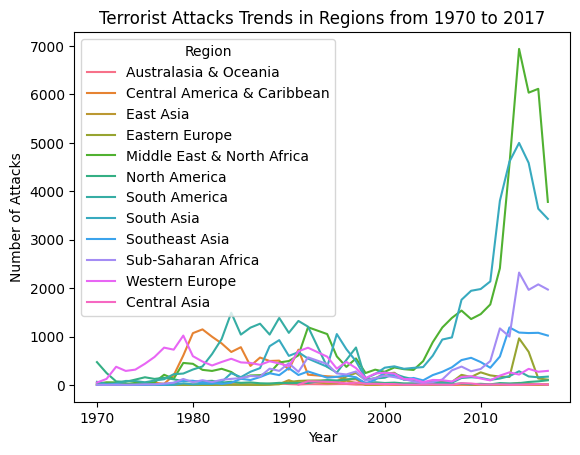

In [20]:
sns.lineplot(x='Year',y='count',hue='Region',data=year_attacks_region)
plt.title('Terrorist Attacks Trends in Regions from 1970 to 2017')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

### **Top 10 countries most affected**

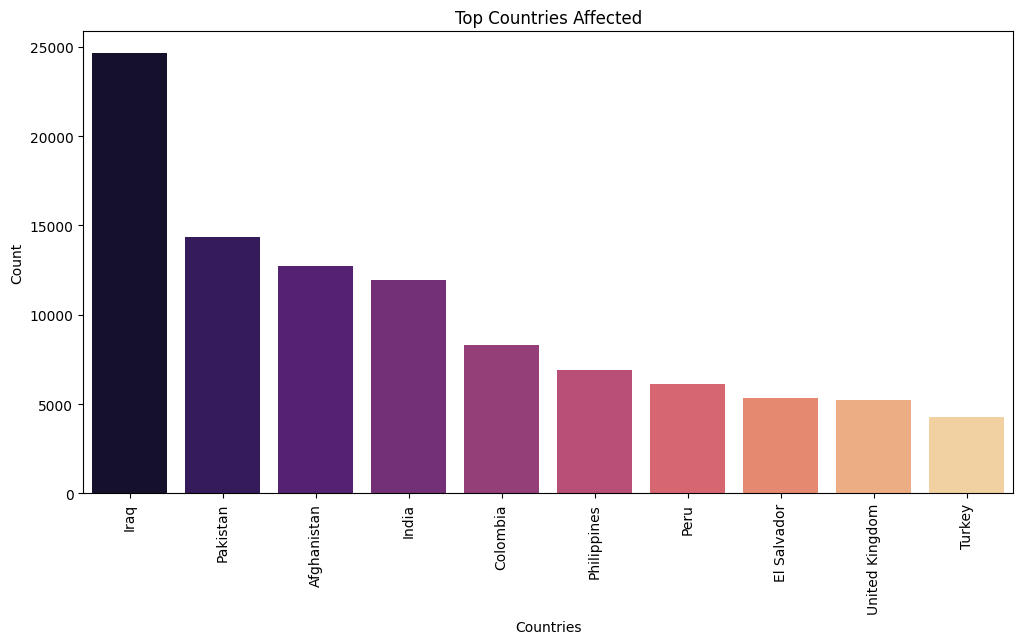

In [21]:
plt.subplots(figsize=(12,6))
top=df['Country'].value_counts()[:10].to_frame().reset_index()
top.columns= ['Country','Attacks_Counts']
sns.barplot(x='Country',y='Attacks_Counts', data= top, palette='magma')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

From the graph we can see the most affected country with terrorism are:

1. Iraq
2. India
3. Pakistan
4. Afghanistan
5. Phillipines

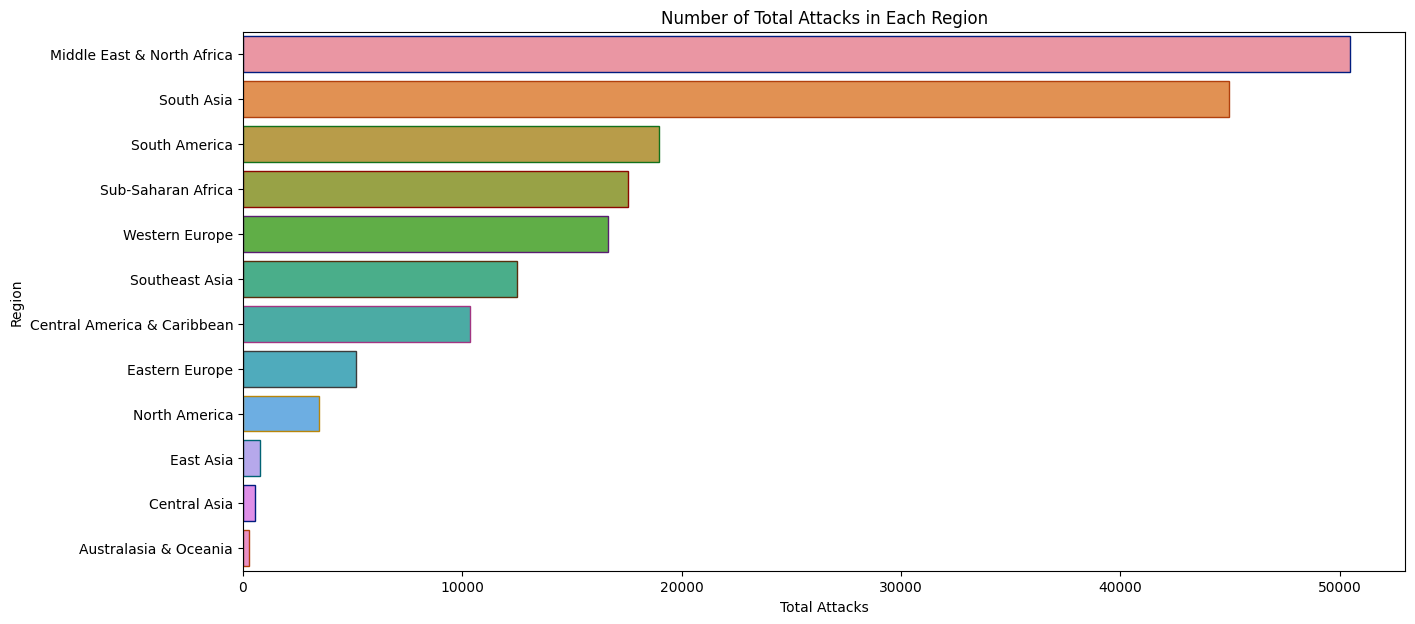

In [22]:
# Region wise attacks

region_attacks= df.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,7))
sns.barplot(x=region_attacks['Total Attacks'], y=region_attacks.Region, edgecolor=sns.color_palette('dark',10),orient='h')
plt.title('Number of Total Attacks in Each Region')
plt.show()

**The most affected region is South Asia followed by Middle east and North Africa in the second position**

In [23]:
# Attacks basaed on the region

region_attack_counts = df.groupby(['Region', 'AttackType']).size().reset_index()
region_attack_counts.columns = ['Region', 'AttackType', 'Attack Count']

region = df.Region.unique()

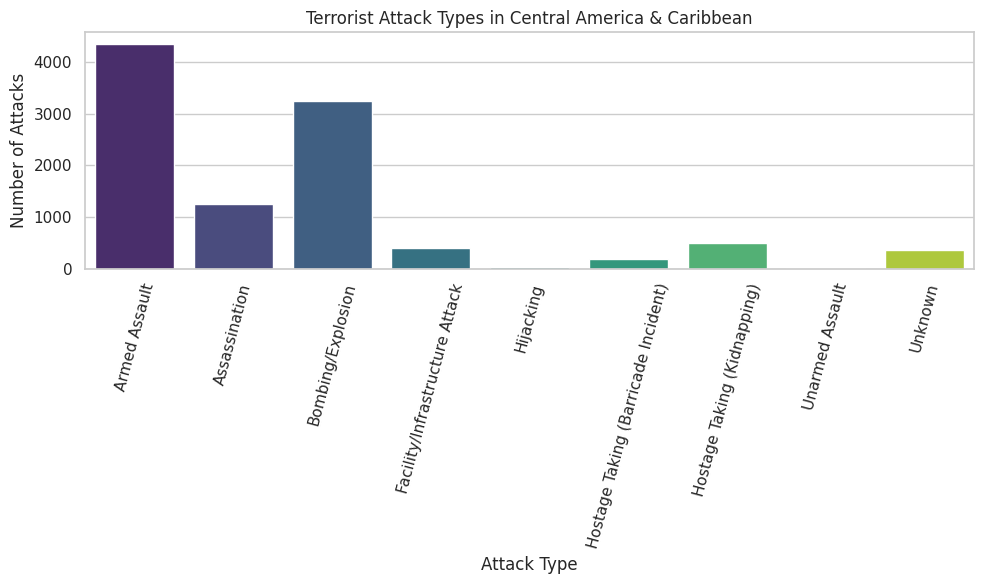

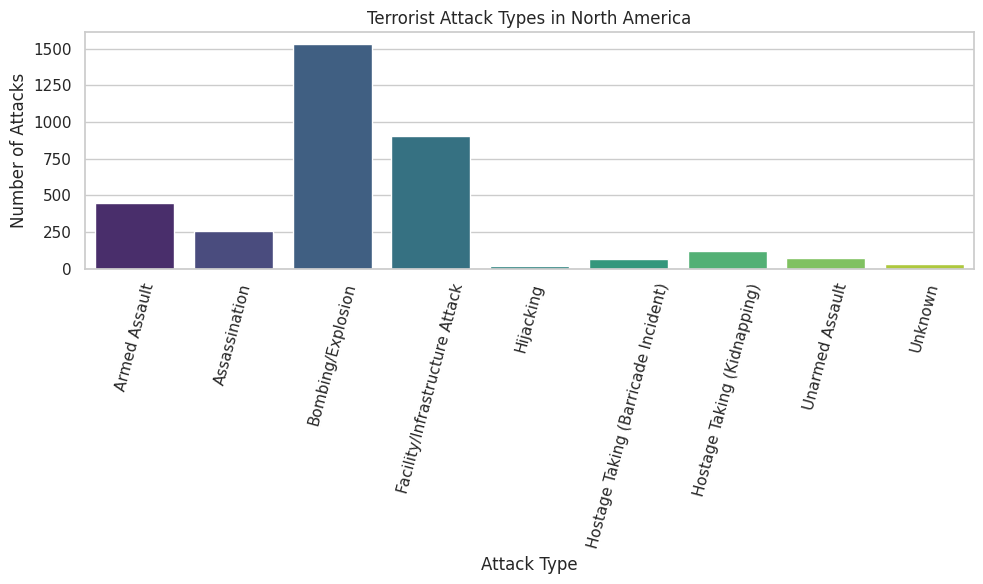

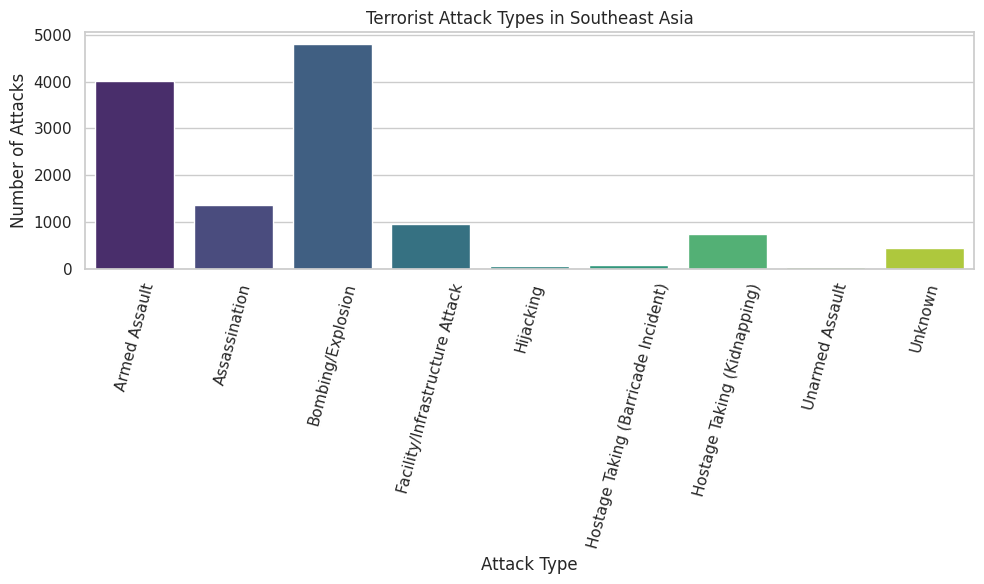

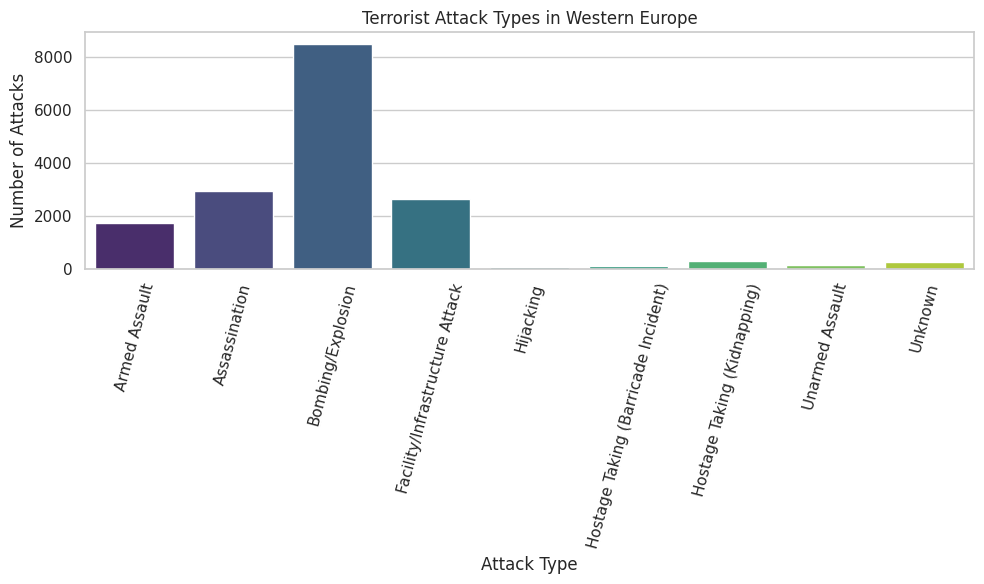

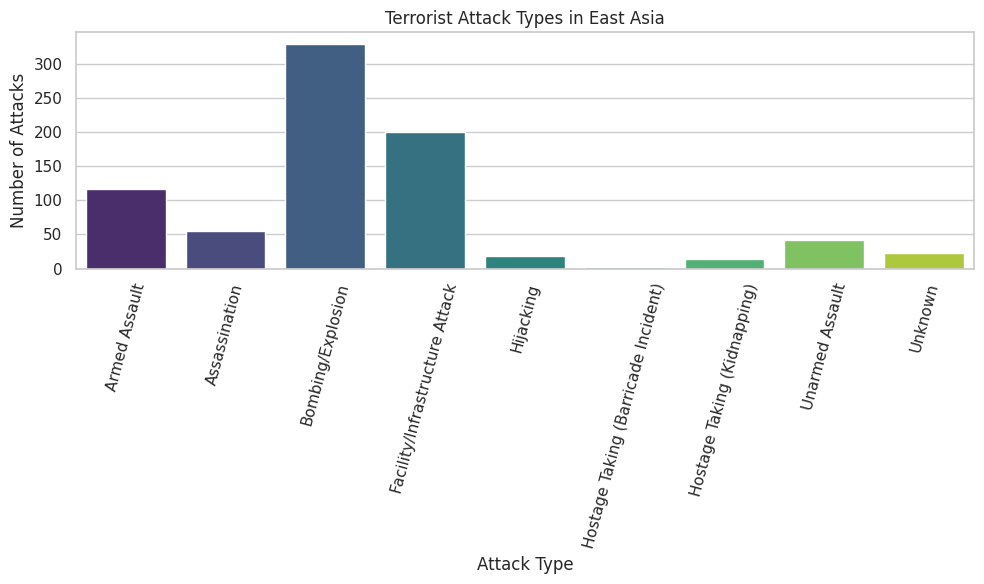

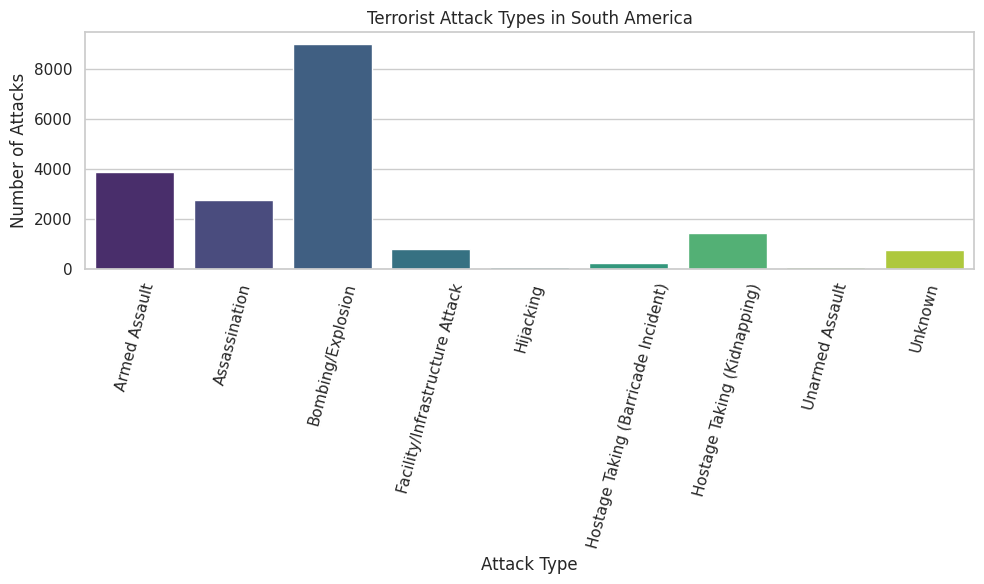

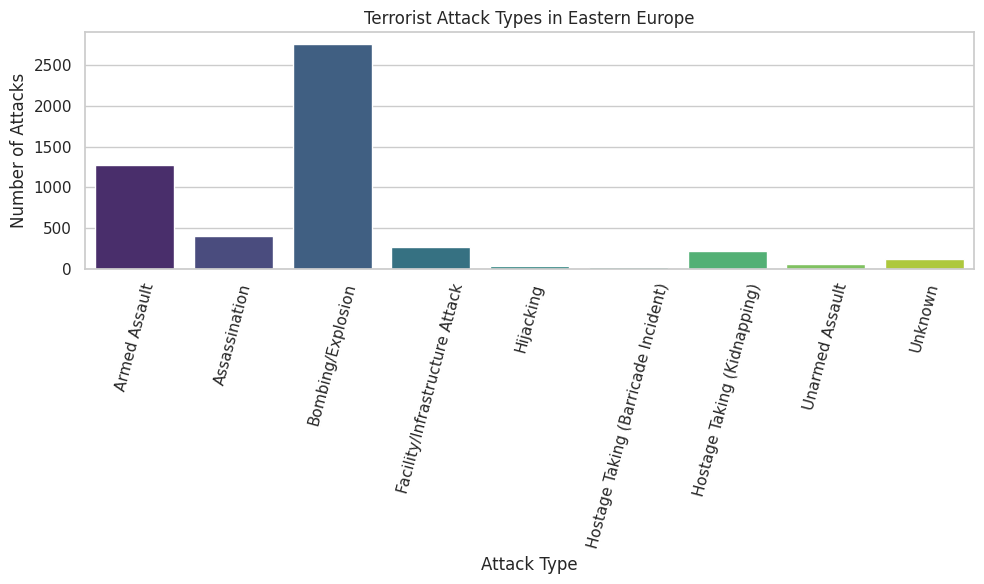

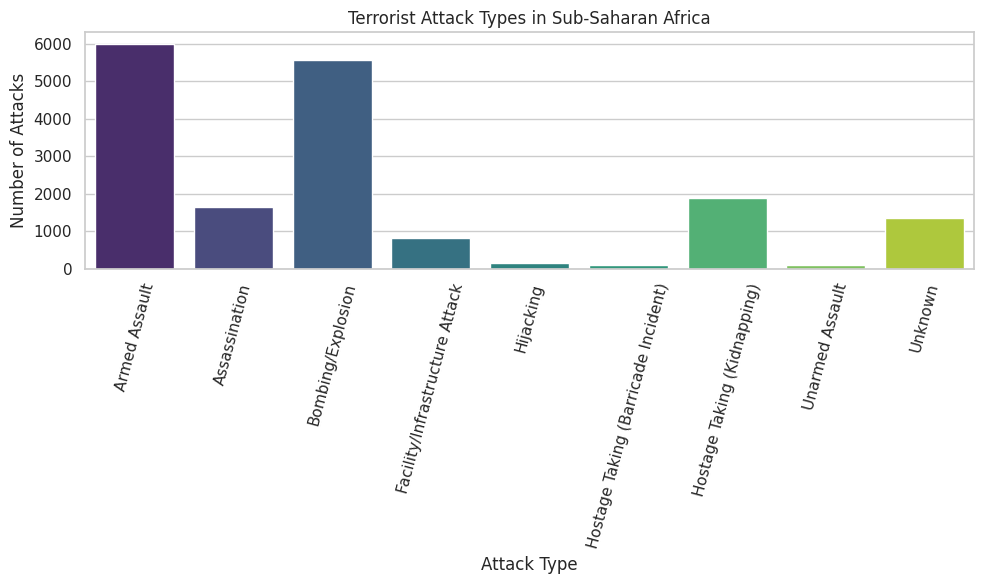

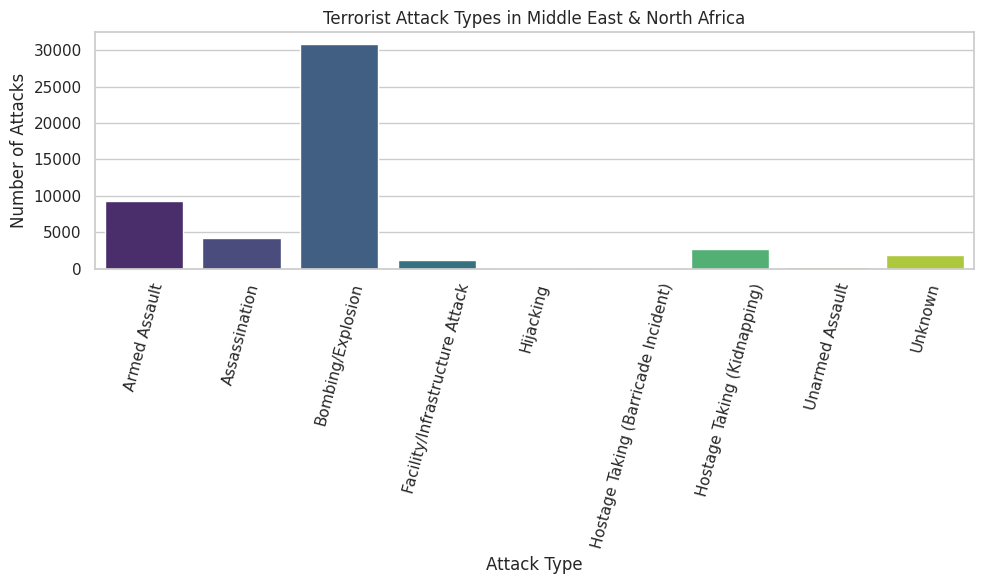

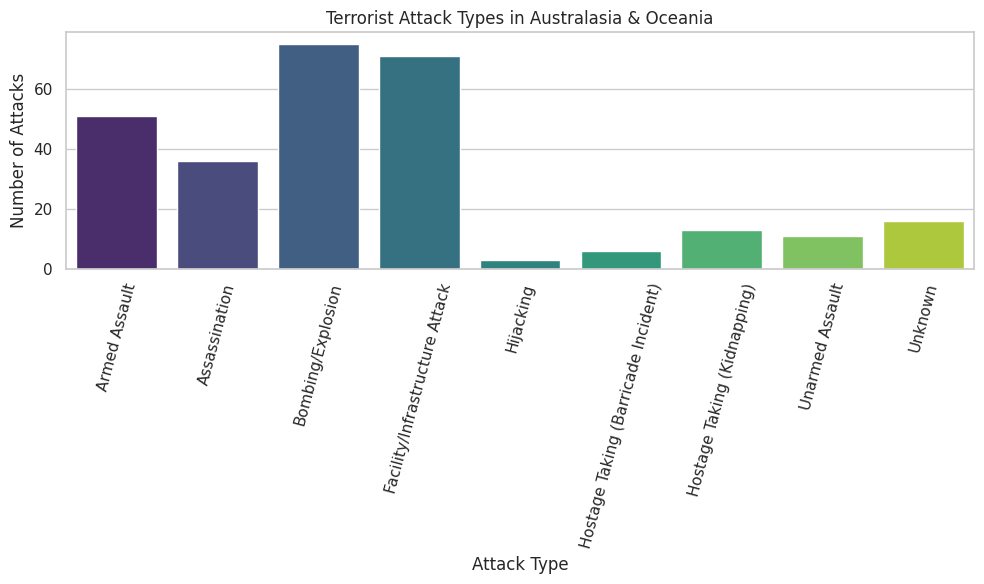

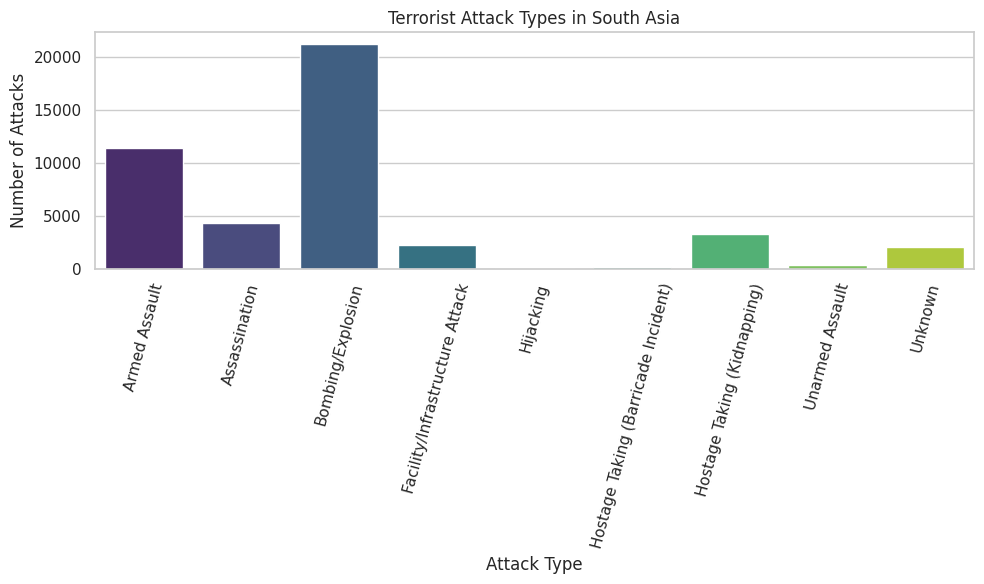

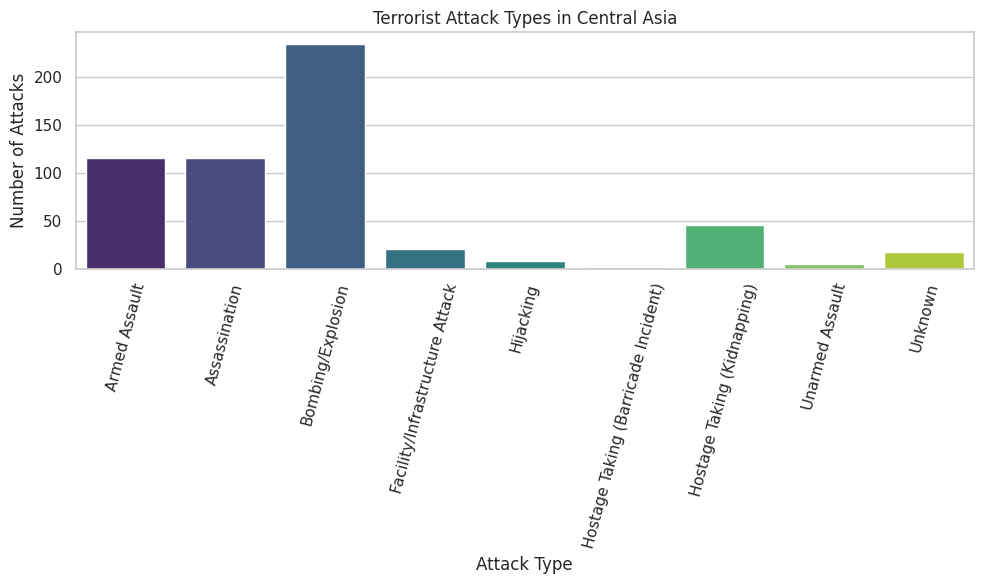

In [24]:
# Attack type specific to region wise

def region_attack_type(region):
    sns.set(style="whitegrid")

    for i in region:
        selected_region = i

        # Filter the data for the selected region
        selected_region_data = region_attack_counts[region_attack_counts['Region'] == selected_region]

        # Create the bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(data=selected_region_data, x='AttackType', y='Attack Count', palette="viridis")
        plt.title(f'Terrorist Attack Types in {selected_region}')
        plt.xlabel('Attack Type')
        plt.ylabel('Number of Attacks')
        plt.xticks(rotation=75)
        plt.tight_layout()

        plt.show()

region_attack_type(region)


**Bombing/Explosion is the most common type of terrorist attack, but in the region of Australia and Oceania' : 'Facility and infrastructure attacks' are more frequent and in the region of Sub-Saharan Africa: Armed Assualt are more common.**

In [25]:
# lets see the different groups activities and their motives and method of attacking

groups = df[['AttackType','Group','Weapon_type','Target_type']]

In [26]:
groups

,AttackType,Group,Weapon_type,Target_type
0,Assassination,MANO-D,Unknown,Private Citizens & Property
1,Hostage Taking (Kidnapping),23rd of September Communist League,Unknown,Government (Diplomatic)
2,Assassination,Unknown,Unknown,Journalists & Media
3,Bombing/Explosion,Unknown,Explosives,Government (Diplomatic)
4,Facility/Infrastructure Attack,Unknown,Incendiary,Government (Diplomatic)
...,...,...,...,...
181686,Armed Assault,Al-Shabaab,Firearms,Military
181687,Bombing/Explosion,Muslim extremists,Explosives,Military
181688,Facility/Infrastructure Attack,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,Private Citizens & Property
181689,Bombing/Explosion,Unknown,Explosives,Government (General)


In [27]:
group_counts = groups['Group'].value_counts()
sort = group_counts.sort_values(ascending=False)

# Select the top 5 most frequent groups
sort = sort.iloc[1:]
top_5 = sort.head(5)

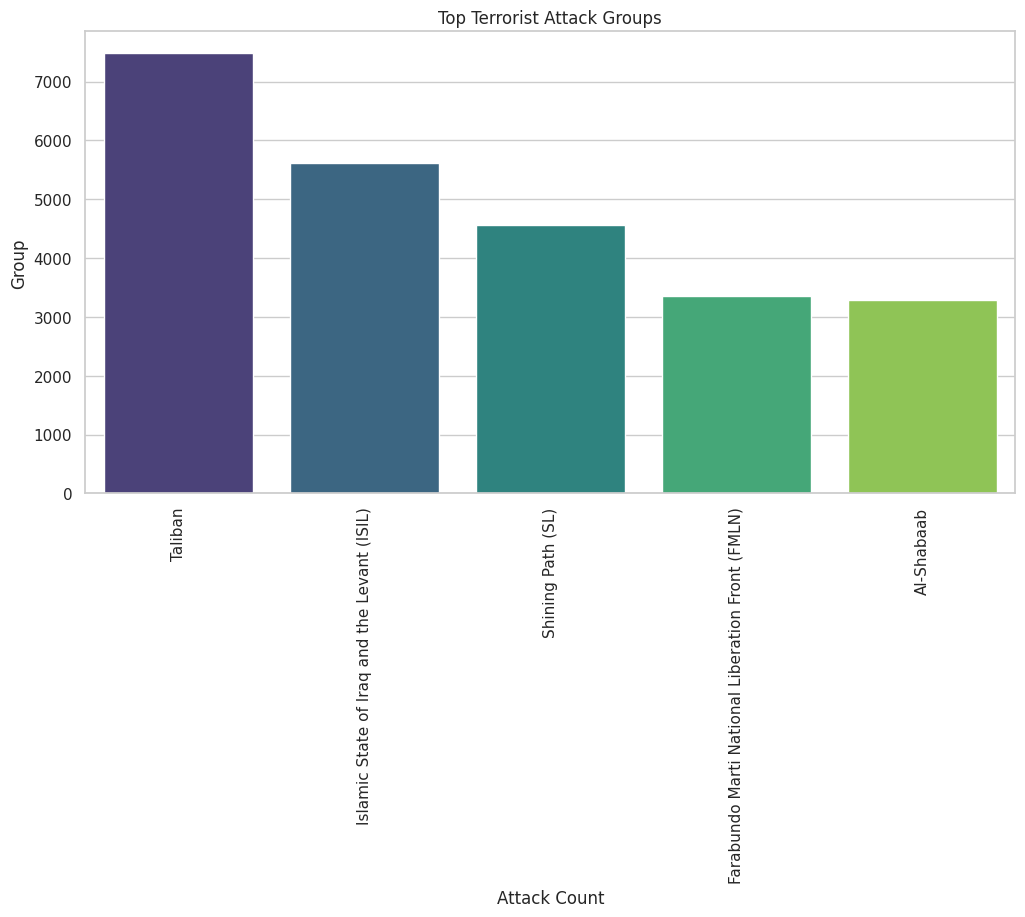

In [28]:
# Plotting top 5 terrorists groups

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5.index, y=top_5.values, palette="viridis")
plt.title('Top Terrorist Attack Groups')
plt.xlabel('Attack Count')
plt.ylabel('Group')
plt.xticks(rotation = 90)
plt.show()

### **Taliban is the most active terrorist group around the world.**

In [29]:
# Correlation between Country and Attack Counts

import plotly.express as px

# Group the data by country and count the number of attacks
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attack Count']

# Create the choropleth map
fig = px.choropleth(country_counts,locations='Country',locationmode='country names', color='Attack Count',
                    title='Terrorist Attacks by Country',
                    labels={'Attack Count': 'Number of Attacks'},
                    hover_name='Country',color_continuous_scale='Blues')

fig.show()

In [30]:
# If we tabularise this map

corr_data = df.groupby('Country').agg({'Country': 'count', 'Killed': 'sum', 'Wounded': 'sum'})
corr_data.columns = ['Total Attacks', 'Total Killed', 'Total Wounded']
corr_data.reset_index(inplace=True)

corr_data['Casualties'] = corr_data['Total Killed']+corr_data['Total Wounded']
corr_data.drop(['Total Killed', 'Total Wounded'],axis = 1,inplace = True)

In [31]:
corr_data

,Country,Total Attacks,Casualties
0,Afghanistan,12731,83661.0
1,Albania,80,168.0
2,Algeria,2743,20216.0
3,Andorra,1,0.0
4,Angola,499,5498.0
...,...,...,...
200,Yemen,3347,18104.0
201,Yugoslavia,203,400.0
202,Zaire,50,535.0
203,Zambia,62,132.0


### **Success rate of terrorist attacks**

In [32]:
noa = df.groupby('Year').size().reset_index(name='count')
noa

,Year,count
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581
5,1975,740
6,1976,923
7,1977,1319
8,1978,1526
9,1979,2662


In [33]:
# Calculating the total number of attacks
sum_of_attacks = noa['count'].sum()
print('Total number of attacks all over the world:', sum_of_attacks)

Total number of attacks all over the world: 181691


In [34]:
# Calculating the success rate
succ = df.groupby(['success']).size().reset_index(name='count')
succ['percentage'] =  succ['count']/sum_of_attacks *100
succ

,success,count,percentage
0,0,20059,11.040173
1,1,161632,88.959827


Text(0.5, 0, 'Outcome')

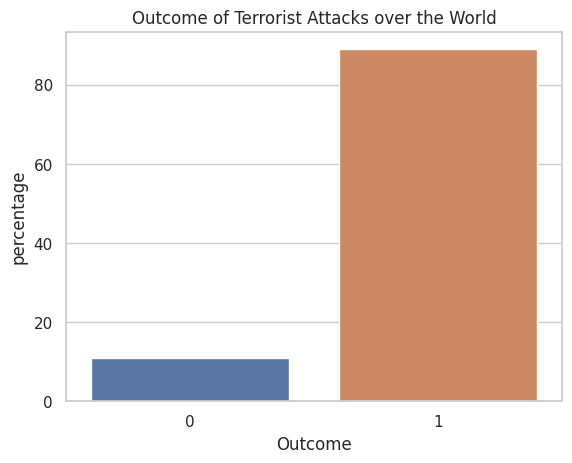

In [35]:
sns.barplot(x = 'success', y = 'percentage', data=succ)
plt.title("Outcome of Terrorist Attacks over the World")
plt.xlabel("Outcome")

**Of all the 181691 attacks 89% were successful, while 11% was unsuccessful.**

## **Terrorist Attacks in India**

In [36]:
India = df[(df['Country'] == 'India')]
India.head(5)

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
1186,197202220004,1972,2,22,India,South Asia,Delhi,New Delhi,28.585836,77.153336,Hijacking,0.0,0.0,B-747,NaN,Palestinians,Airports & Aircraft,Explosives,NaN,1
2764,197501190004,1975,1,2,India,South Asia,Bihar,Samastipur,25.863042,85.781004,Bombing/Explosion,4.0,0.0,Lalit Narayan Mishra and a legislator,"1/2/1975: The Indian Railway Minister, Lalit N...",Ananda Marga,Government (General),Explosives,Unknown,1
3857,197605260001,1976,5,26,India,South Asia,Delhi,New Delhi,28.585836,77.153336,Bombing/Explosion,0.0,0.0,New Delhi airport,NaN,Unknown,Airports & Aircraft,Explosives,NaN,1
5327,197709280004,1977,9,28,India,South Asia,Maharashtra,Bombay,19.075984,72.877656,Hijacking,0.0,0.0,DC-8,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,1
7337,197901130004,1979,1,13,India,South Asia,Assam,Unknown,26.200605,92.937574,Armed Assault,NaN,NaN,patrol,NaN,Naga People,Police,Firearms,NaN,1


In [37]:
#how many number of attacks where there in India
India_attacks = India['eventid'].count()
print('There were',India_attacks ,'attacks in India.')

There were 11960 attacks in India.


In [38]:
India_success = India.groupby('success').size().reset_index(name='count')
India_success['percentage'] = India_success['count'] / India_attacks * 100
India_success

,success,count,percentage
0,0,1680,14.046823
1,1,10280,85.953177


Text(0.5, 0, 'Outcome')

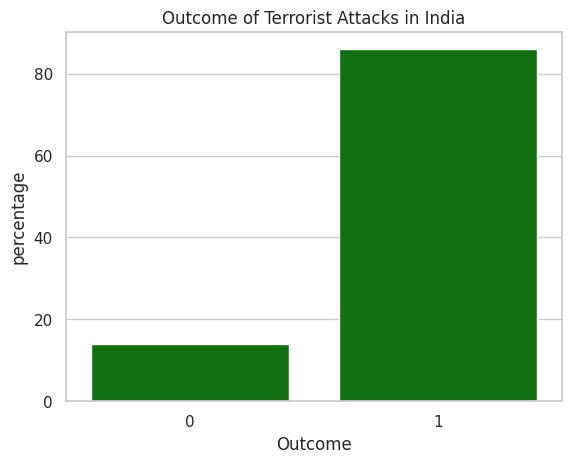

In [39]:
sns.barplot(x='success', y='percentage', data = India_success, color='green')
plt.title("Outcome of Terrorist Attacks in India")
plt.xlabel("Outcome")

### **Of the 11960 attacks in India, 85% were successful, while 15% was unsuccessful.**

## **Attack types in India and their success rates.**¶


In [40]:
attack_types_India = India.groupby(['AttackType','success']).size().reset_index(name='count')
attack_types_India

,AttackType,success,count
0,Armed Assault,0,244
1,Armed Assault,1,2940
2,Assassination,0,228
3,Assassination,1,1001
4,Bombing/Explosion,0,1128
5,Bombing/Explosion,1,3697
6,Facility/Infrastructure Attack,0,33
7,Facility/Infrastructure Attack,1,963
8,Hijacking,0,4
9,Hijacking,1,39


Text(0.5, 1.0, 'Facility ')

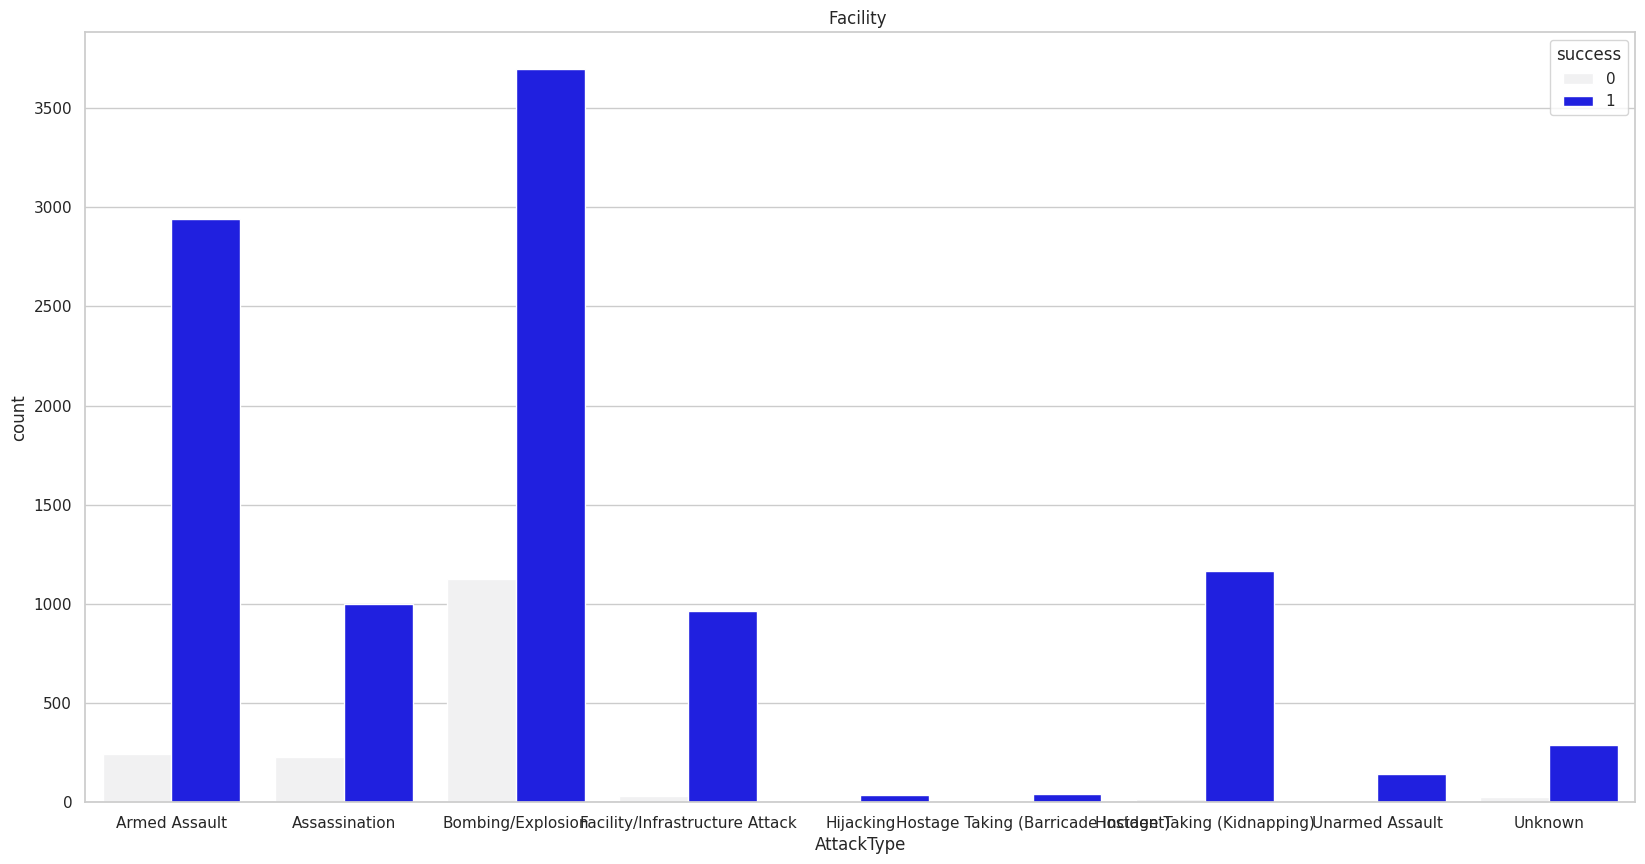

In [41]:
plt.figure(figsize=(20,10))
sns.barplot(x='AttackType', y='count', hue='success', data=attack_types_India, color = "blue")
plt.title("Facility ")

In [42]:
#number of kills
nkills_India = India.groupby('AttackType')[['Killed']].sum().reset_index()
nkills_India


,AttackType,Killed
0,Armed Assault,9378.0
1,Assassination,2001.0
2,Bombing/Explosion,5830.0
3,Facility/Infrastructure Attack,135.0
4,Hijacking,42.0
5,Hostage Taking (Barricade Incident),136.0
6,Hostage Taking (Kidnapping),819.0
7,Unarmed Assault,28.0
8,Unknown,972.0


<Axes: xlabel='AttackType', ylabel='Killed'>

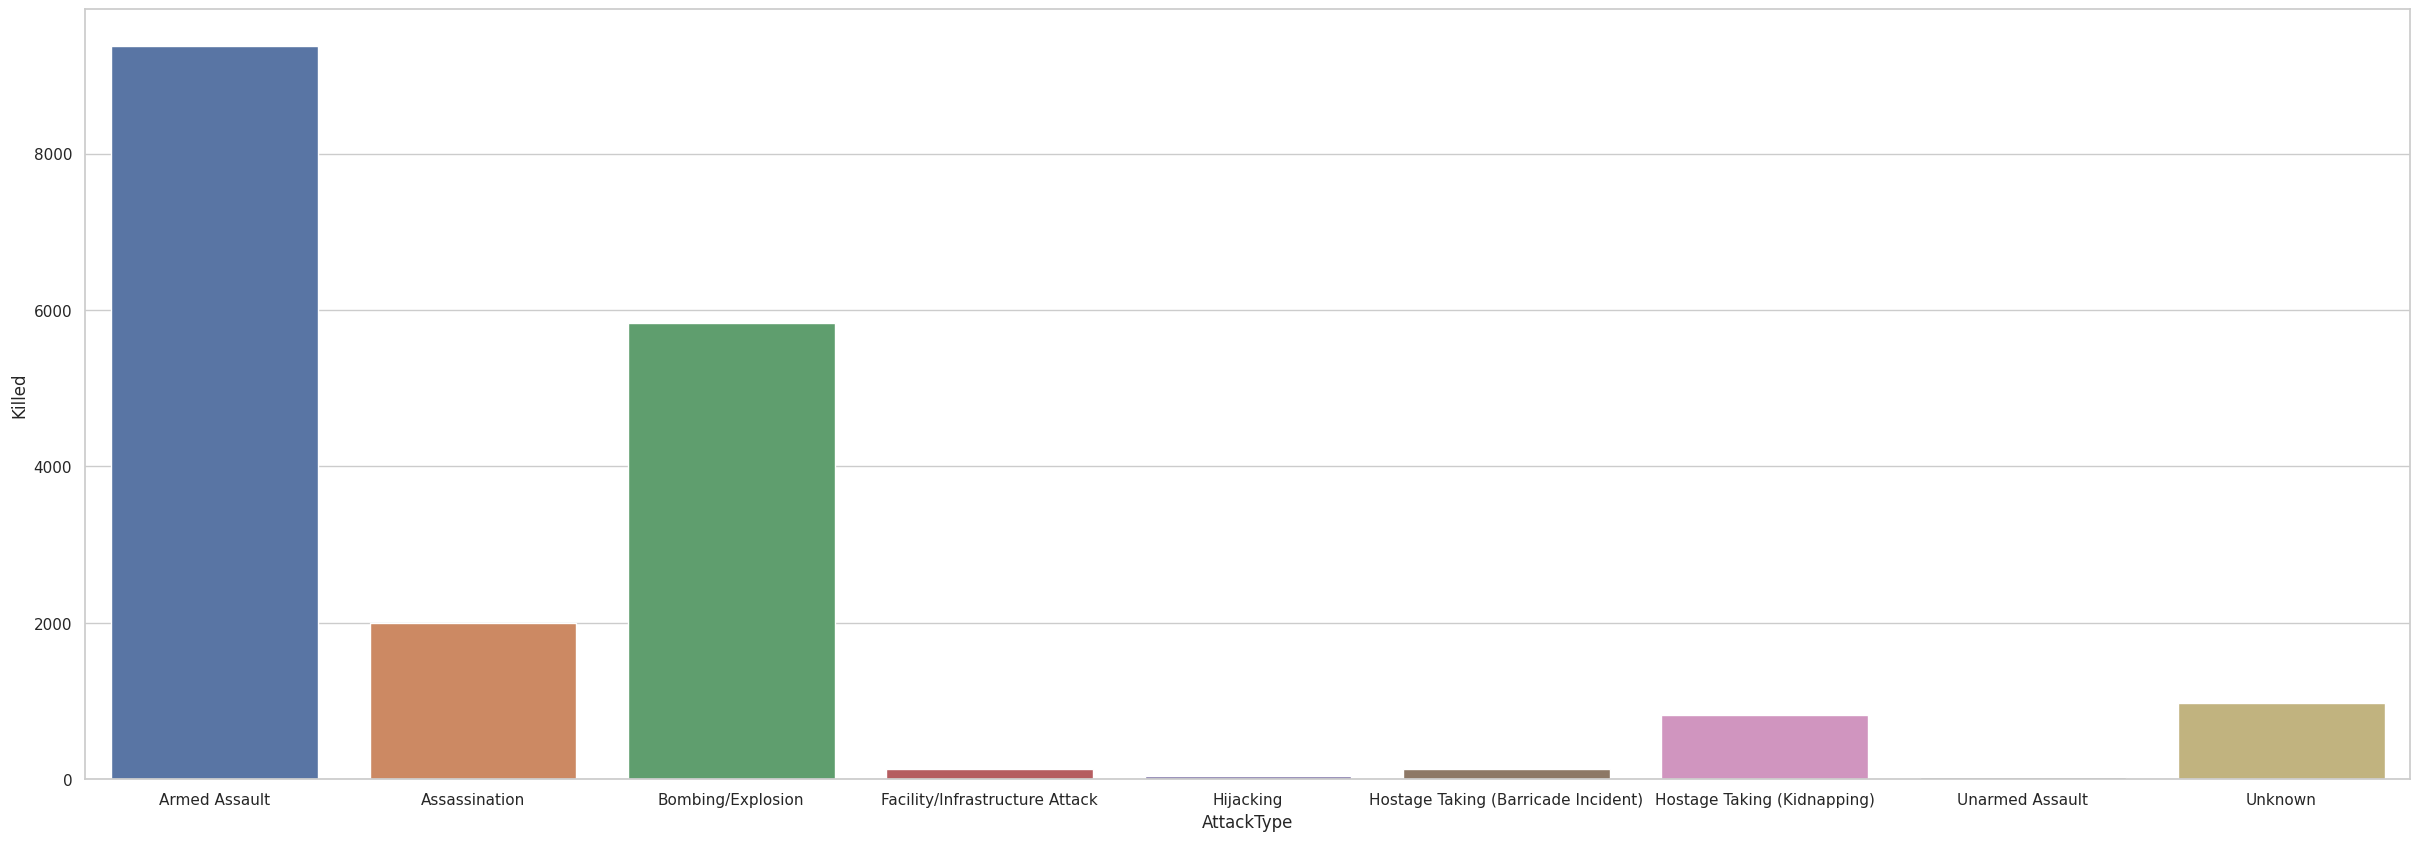

In [43]:
plt.figure(figsize=(30,10))
sns.barplot(x='AttackType', y='Killed', data=nkills_India)

## **Conclusion**

**Terrorism Attacks all around the world is becoming increasingly a problem! The number of terrorist attacks in the Middle East and North Africa and South America increased significantly.
89% of attacks have been successful and 11% unsuccessful, with bombing/ explosion causing the most casualties.**